In [21]:
import pandas as pd

from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic, ADIDA, IMAPA, TSB

Fora o Croston apresentado no livro fpp3, existem outros modelos para time series intermitentes, esse artigo cita alguns desses modelos e a implementação simples no dataset do livro.

https://forecastegy.com/posts/intermittent-time-series-forecasting-in-python

Achei muito bem explicado esse trecho do artigo:

"""
We can think about intermittent time series forecasting as a two-step process:

The first step is to determine if there will be a value different from zero today.

This is equivalent to asking the question “Will there be rain today?” or “Will we sell a product today?”

The second step is to determine how much of the value there will be.

There is no point in forecasting a value when we predict it will be zero.

This is equivalent to asking the question “If it rains, how much will it rain?” or “If we sell a product today, how many will we sell?”

Most of the models for intermittent time series forecasting will follow this two-step process.

Some of them will vary how they calculate each step (Croston, for example, uses the interval between demand occurrences to calculate the probability of demand), but they follow the same general idea.
"""

#### 1.0. PBS J06

In [5]:
df = pd.read_csv("../data/PBS.csv")

df = df.loc[df["ATC2"] == "J06", ["Month", "Scripts"]].reset_index(drop=True)

df.Month = pd.to_datetime(df.Month, format="%Y %b")

df = df.groupby("Month").sum().reset_index()

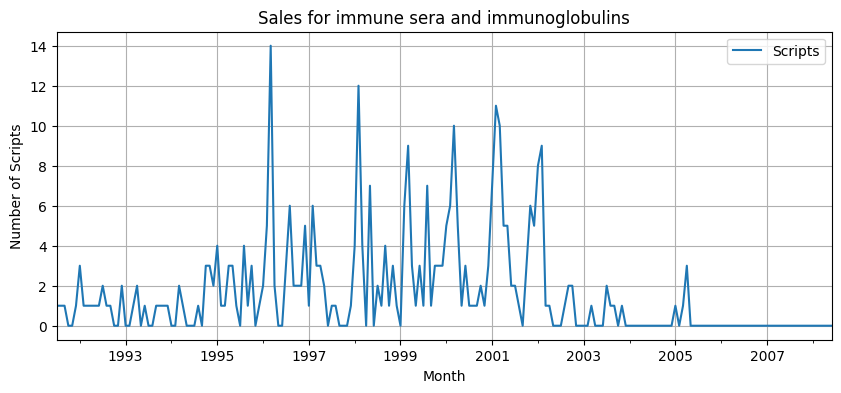

In [6]:
df.plot(
    x="Month", figsize=(10, 4), grid=2,
    title="Sales for immune sera and immunoglobulins",
    ylabel="Number of Scripts"
);

In [11]:
cr = CrostonClassic(alias="cr").fit(df["Scripts"].to_numpy())

In [19]:
cr.predict(10)["mean"]

array([0.86889213, 0.86889213, 0.86889213, 0.86889213, 0.86889213,
       0.86889213, 0.86889213, 0.86889213, 0.86889213, 0.86889213],
      dtype=float32)

In [24]:
df.columns = ["ds", "y"]
df["unique_id"] = "a"

In [25]:
models = [
    ADIDA(), 
    CrostonClassic(), 
    IMAPA(), 
    TSB(
        alpha_d=0.5,
        alpha_p=0.5
    )
]

sf = StatsForecast(
    models=models,
    freq="MS"
).fit(df)

In [28]:
sf.forecast(10)

,ds,ADIDA,CrostonClassic,IMAPA,TSB
unique_id,,,,,
a,2008-07-01,0.002757,0.868892,0.002757,5.945910e-12
a,2008-08-01,0.002757,0.868892,0.002757,5.945910e-12
a,2008-09-01,0.002757,0.868892,0.002757,5.945910e-12
a,2008-10-01,0.002757,0.868892,0.002757,5.945910e-12
a,2008-11-01,0.002757,0.868892,0.002757,5.945910e-12
a,2008-12-01,0.002757,0.868892,0.002757,5.945910e-12
a,2009-01-01,0.002757,0.868892,0.002757,5.945910e-12
a,2009-02-01,0.002757,0.868892,0.002757,5.945910e-12
a,2009-03-01,0.002757,0.868892,0.002757,5.945910e-12
